# Legolas Demo Code

Use this code to test your calibration values and as a reference for solving the challenges

In [ ]:
#Not needed if you have already installed GPy and GPyOpt
!pip install GPy
# GPFlow, GPyTorch
!pip install GPyOpt

In [5]:
from core import *
import utils
import time as time
from pathlib import Path

# import time is in core
# import Path is in core

In [11]:
# this is how you reset the rpyc server when facing the port already in use
# need to change to actual host name
host_1 = "192.168.1.11"
host_2 = "192.168.1.14"

utils.restart_server(host=host_1)
utils.restart_server(host=host_2)

kill server at PID:10054
restarting the rpyc server at host: 192.168.1.11
rpyc server start successfully
kill server at PID:128206
restarting the rpyc server at host: 192.168.1.14
rpyc server start successfully


In [12]:
stage, depo_device, pH_device, conn1, conn2, config = load_from_config("config.yaml")

In [ ]:
#!dir .

In [9]:
# find the usb port if problem occur
list_ports = conn1.modules['serial.tools.list_ports']

ports=list_ports.comports()
for port, desc, hwid in sorted(ports):
    print(port, desc, hwid)

NameError: name 'conn1' is not defined

## Test Device Functionality

In [ ]:
# Go to Home Position and do other things. Be careful with this command.
reset(stage=stage, pH_device=pH_device, depo_device=depo_device)
# stage.home()

In [61]:
# Go to Home Position
stage.home()

(647, 140)

In [130]:
# Drop pH meter and raise it up (don't run if pH path is obstructed)
pH_device.to_zpos("full_down")
pH_device.to_zpos("full_up")

In [120]:
# pH meter and raise it up (don't run if pH path is obstructed)
pH_device.to_zpos("full_up")

In [119]:
# Drop pH meter and raise it up (don't run if pH path is obstructed)
pH_device.to_zpos("full_down")

In [6]:
# Drop deposition device and raise it up (don't run if syringe path is obstructed)
depo_device.to_zpos("full_down")
depo_device.to_zpos("full_up")

In [56]:
pH_device.to_zpos("full_up")
stage.home()
stage.move_to_cell(0,1)
pH_device.to_zpos("full_down")

## Test Cell Mapping and Accuracy
Use this code to see if pH device is aligning with the cell map properly

If calibrated properly with the pH sensor, "stage" and "pH_device" will move the cart to the same spot

In [27]:
stage.home()

(49, 718)

In [26]:
stage.move_to_cell(0,0)

In [8]:
stage.get_XYloc()

(-82, -542)

In [29]:
pH_device.to_zpos("full_down")

In [26]:
pH_device.to_zpos("full_up")

In [28]:
stage.move_to_cell(1,0)

In [62]:
#Test positioning in Row 1, start with everything full_up
pH_device.to_zpos("full_up")
stage.home()
#stage.move_to_cell(0,0)
for i in range(6):
    stage.move_to_cell(0,i)
    pH_device.to_zpos("full_down")
    pH_device.to_zpos("full_up")
    #time.sleep(2)

In [4]:
#Test positioning in specified row
pH_device.to_zpos("full_up")
stage.home()
#stage.move_to_cell(0,0)
for j in range (4):
    for i in range(6):
        stage.move_to_cell(j,i)
        print("j,i =",j,",",i)
        pH_device.to_zpos("full_down")
        #time.sleep(2)
        pH_device.to_zpos("full_up")
        #time.sleep(2)

j,i = 0 , 0
j,i = 0 , 1
j,i = 0 , 2
j,i = 0 , 3
j,i = 0 , 4
j,i = 0 , 5
j,i = 1 , 0
j,i = 1 , 1
j,i = 1 , 2
j,i = 1 , 3


TimeoutError: result expired

Socket exception: An existing connection was forcibly closed by the remote host (10054)
Socket exception: An existing connection was forcibly closed by the remote host (10054)


In [ ]:
stage.move_to_cell(3, 0)
pH_device.to_zpos("full_down")
pH_device.to_zpos("full_up")

In [14]:
depo_device.move_to_cell(0,0)
depo_device.to_zpos("full_down")
depo_device.to_zpos("full_up")

In [15]:
stage.move_to_loc("clean")
depo_device.to_zpos("full_down")
depo_device.to_zpos("full_up")
#pH_device.to_zpos("full_down")
#pH_device.to_zpos("full_up")

## Test pH device

In [ ]:
# this is the pH meter
pH_device

In [126]:
pH_device.to_zpos("full_up")
stage.home()

(1272, -88)

In [127]:
# the cleaning location can be used to wash off any acidic or basic solution from the probe prior to measurements
# it is not necessary to use this in your code, but if you are getting incorrect pH values you may need to clean with DI
pH_device.move_to_loc("clean")
pH_device.to_zpos("full_down")
pH_device.to_zpos("full_up")
pH_device.to_zpos("full_down")
pH_device.to_zpos("full_up")
pH_device.to_zpos("full_down")
pH_device.to_zpos("full_up")

In [128]:
pH_device.move_to_cell(row=0, col=1)

In [133]:
# Check pH values
pH_device.to_zpos("full_down")

In [12]:
voltage = pH_device.pH_measure(40)
pH = 16.746*voltage-40.188
print(pH)

pH is Measured as: 2.81
6.868259999999992


Socket exception: An existing connection was forcibly closed by the remote host (10054)
Socket exception: An existing connection was forcibly closed by the remote host (10054)
Socket exception: An existing connection was forcibly closed by the remote host (10054)
Socket exception: An existing connection was forcibly closed by the remote host (10054)


In [36]:
pH_device.to_zpos("full_up")

In [ ]:
# Cleaning locations in wells
pH_device.move_to_cell(row=0, col=0)
pH_device.to_zpos("full_down")
pH_device.to_zpos("full_up")

In [ ]:
# Repeated measurements of standard.
# Clean first.
row=3
col=0
for index in range(6):
    pH_device.move_to_cell(row, col)
    pHmeas = pH_device.pH_measure(20)
    print(f"row {row} col {col} pH {pHmeas}")     

In [ ]:
stage.home()

In [5]:
pH_device.to_zpos("full_up")
stage.home()
pH_device.move_to_loc("blot")
pH_device.to_zpos("full_down")
time.sleep(1)
pH_device.to_zpos("full_up")

slope: 16.74571324334186, intercept: -40.187887632251034


<function matplotlib.pyplot.show(close=None, block=None)>

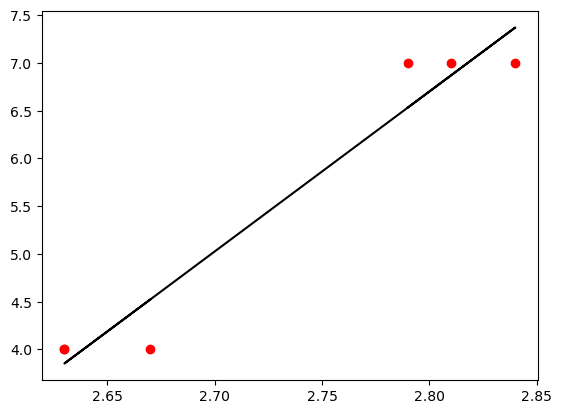

In [28]:
#making the calibration of the pH sensor

y = [4,4,4,7,7,7]
x = [2.67,2.63,2.63,2.84,2.81,2.79]

line = np.polyfit(x,y,1)
print(f'slope: {line[0]}, intercept: {line[1]}')
trend = np.poly1d(line)
plt.plot(x,y, 'ro', x, trend(x), '-k')
plt.show

pH is Measured as: 2.39
pH is Measured as: 2.48
slope: 33.33333333333309, intercept: -75.66666666666606
pH is Measured as: 2.41
pH 4 = 4.666666666666686


<function matplotlib.pyplot.show(close=None, block=None)>

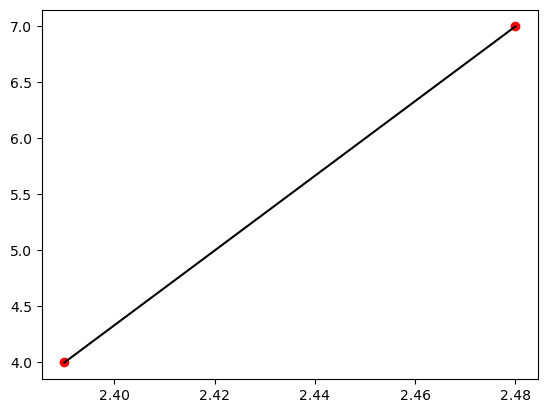

Socket exception: An existing connection was forcibly closed by the remote host (10054)
Socket exception: An existing connection was forcibly closed by the remote host (10054)


In [16]:
#making the calibration of the pH sensor

def clean():
    pH_device.move_to_loc("clean")
    pH_device.to_zpos("full_down")
    pH_device.to_zpos("full_up")
    pH_device.to_zpos("full_down")
    pH_device.to_zpos("full_up")

def blot():
    pH_device.move_to_loc("blot")
    pH_device.to_zpos("full_down")
    time.sleep(1)
    pH_device.to_zpos("full_up")
    
def measure(j,i):
    pH_device.move_to_cell(row=j, col=i)
    pH_device.to_zpos("full_down")
    k = pH_device.pH_measure(30)
    pH_device.to_zpos("full_up")
    return k
    #time.sleep(5)
   
stage.home()

#CALIBRATION

y = [7, 4, 7, 4, 7, 4]
x = []

for i in range(6):
    clean()
    blot()
    if i % 2 == 0:
        m7 = measure(2,0)
        x.append(m7)
    else:
        m4 = measure(2,1)
        x.append(m4)
        
#PLOTTING FIT

line = np.polyfit(x,y,1)
print(f'slope: {line[0]}, intercept: {line[1]}')
trend = np.poly1d(line)
plt.plot(x,y, 'ro', x, trend(x), '-k')
plt.show
#time.sleep(5)

#TESTING

m = []

for i in range(2,5):
    clean()
    blot()
    mx = measure(0,i)
    m.append(mx)
    
print(f'pH [1/1]= {line[0]*m[0]+line[1]}')

print(f'pH [3/1]= {line[0]*m[1]+line[1]}')

print(f'pH [1/3]= {line[0]*m[2]+line[1]}')

clean()
blot()
m4x = measure(2,1)

print(f'pH 4= {line[0]*m4x+line[1]}')

clean()
blot()
m7x = measure(2,0)

print(f'pH 7= {line[0]*m7x+line[1]}')

Voltage is Measured as: 2.99
Voltage is Measured as: 2.52
Voltage is Measured as: 3.00
Voltage is Measured as: 2.51
Voltage is Measured as: 2.99
Voltage is Measured as: 2.52
slope: 6.291245050593923, intercept: -11.832380114386261
Voltage is Measured as: 2.98
pH = 6.91553013638363


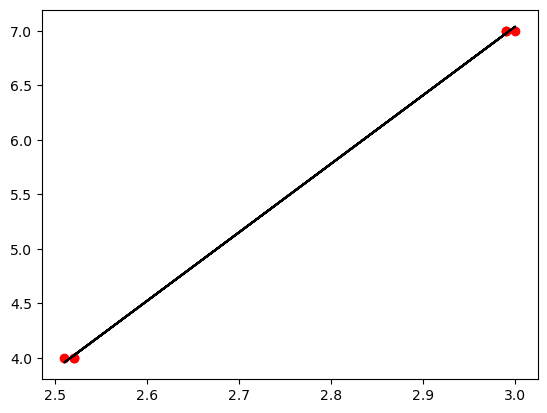

In [14]:
#making the calibration of the pH sensor

def clean():
    pH_device.move_to_loc("clean")
    pH_device.to_zpos("full_down")
    pH_device.to_zpos("full_up")
    pH_device.to_zpos("full_down")
    pH_device.to_zpos("full_up")

def blot():
    pH_device.move_to_loc("blot")
    pH_device.to_zpos("full_down")
    time.sleep(1)
    pH_device.to_zpos("full_up")
    
def measure(j,i):
    pH_device.move_to_cell(row=j, col=i)
    pH_device.to_zpos("full_down")
    k = pH_device.pH_measure(30)
    pH_device.to_zpos("full_up")
    return k
    #time.sleep(5)
    
stage.home()
    
#CALIBRATION

y = [7, 4, 7, 4, 7, 4]
x = []

for i in range(6):
    clean()
    blot()
    if i % 2 == 0:
        m7 = measure(2,0)
        x.append(m7)
    else:
        m4 = measure(2,1)
        x.append(m4)
        
#PLOTTING FIT

line = np.polyfit(x,y,1)
print(f'slope: {line[0]}, intercept: {line[1]}')
trend = np.poly1d(line)
plt.plot(x,y, 'ro', x, trend(x), '-k')
plt.show
#time.sleep(5)

clean()
blot()
mx = measure(1,2)

print(f'pH = {line[0]*mx+line[1]}')

Voltage is Measured as: 2.26
Voltage is Measured as: 2.36
slope: 29.999999999999847, intercept: -63.799999999999606
Voltage is Measured as: 2.25
pH = 3.7000000000000526


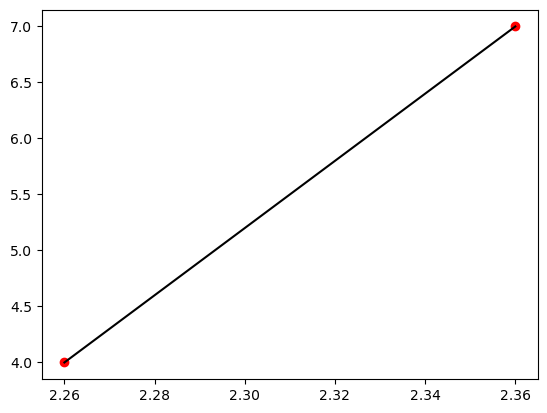

In [4]:
#making the calibration of the pH sensor

m4 = pH_device.pH_measure(30)

time.sleep(5)

m7 = pH_device.pH_measure(30)

y = [4,7]
x = [m4,m7]

line = np.polyfit(x,y,1)
print(f'slope: {line[0]}, intercept: {line[1]}')
trend = np.poly1d(line)
plt.plot(x,y, 'ro', x, trend(x), '-k')
plt.show
time.sleep(5)

m4_2 = pH_device.pH_measure(30)

print(f'pH = {line[0]*m4_2+line[1]}')

In [5]:
voltage = pH_device.pH_measure(30)
print('voltage: ', voltage)

pH is Measured as: 2.43
voltage:  2.43


## Test depo_device (syringe) functionality

In [ ]:
# this is the syringe
depo_device

In [14]:
stage.home()

(333, 5309)

In [32]:
depo_device.move_to_cell(0,0)
depo_device.to_zpos("full_down")
#depo_device.to_zpos("full_up")

In [33]:
#depo_device.move_to_cell(0,0)
#depo_device.to_zpos("full_down")
depo_device.to_zpos("full_up")

In [11]:
#depo_device.move_to_cell(0,0)
#depo_device.to_zpos("full_down")
#depo_device.to_zpos("full_up")
for i in range(2):
    depo_device.move_to_cell(0,i)
    depo_device.to_zpos("full_down")
    depo_device.to_zpos("full_up")

TimeoutError: result expired

Socket exception: An existing connection was forcibly closed by the remote host (10054)
Socket exception: An existing connection was forcibly closed by the remote host (10054)
Socket exception: An existing connection was forcibly closed by the remote host (10054)
Socket exception: An existing connection was forcibly closed by the remote host (10054)


In [10]:
# go to acid (or base or clean) well and test range of motion
depo_device.move_to_loc("clean")
depo_device.to_zpos("full_down")
depo_device.to_zpos("full_up")

TimeoutError: result expired

In [ ]:
# acquire 0.6 mL from the acid reservoir
depo_device.acquire(0.3, location="acid")

In [ ]:
# deposit the 0.6 mL into the 0,0 sample well
# calib is lost at this step. Regain by going home first.
stage.home()
depo_device.deposition(0.6, row=0, col=4)

## Example Loops

Use these loops as a reference for ways to construct your autonomous experiments and the functions needed

In [50]:
stage.home() #GO HOME BEFORE EVERYTHING
depo_device.acquire(0.6, location="acid") #RUN ACQUIRE BEFORE DEPOSITION
stage.home()
depo_device.deposition(0.6, row=0, col=3)
#depo_device.deposition(0.2, row=0, col=2)
#depo_device.deposition(0.3, row=0, col=3)

In [54]:
stage.home()
depo_device.acquire(0.6, location="acid")
stage.home()
depo_device.deposition(0.3, row=0, col=1)
stage.home()
depo_device.deposition(0.1, row=0, col=2)
stage.home()
depo_device.deposition(0.2, row=0, col=3)

Socket exception: An existing connection was forcibly closed by the remote host (10054)
Socket exception: An existing connection was forcibly closed by the remote host (10054)
Socket exception: An existing connection was forcibly closed by the remote host (10054)
Socket exception: An existing connection was forcibly closed by the remote host (10054)
Socket exception: An existing connection was forcibly closed by the remote host (10054)
Socket exception: An existing connection was forcibly closed by the remote host (10054)
Socket exception: An existing connection was forcibly closed by the remote host (10054)
Socket exception: An existing connection was forcibly closed by the remote host (10054)
Socket exception: An existing connection was forcibly closed by the remote host (10054)
Socket exception: An existing connection was forcibly closed by the remote host (10054)
Socket exception: An existing connection was forcibly closed by the remote host (10054)
Socket exception: An existing co

In [ ]:
pH_device.to_zpos("full_down")

In [ ]:
#for row in range(4):
for row in range(1):
    stage.home()
    for col in range(3,5):  #6 for full row
        depo_device.acquire(0.6, location="acid")
        depo_device.deposition(0.6, row=row, col=col)
        
        """
        if col==0:
            colleft=0
        else: 
            colleft=col-1
        pH_device.move_to_cell(row=row, col=colleft)
        """
        pH_device.move_to_cell(row=row, col=col)
        #pH = pH_device.pH_measure(stable_time=1)
        pH=10
        print(f"row {row} col {col} pH {pH}")

In [ ]:
def pHcorrection(pHmeas, p1, p2):
# correct pH values. pHmeas is the measured pH with no correction.
# p1 variable is the measured value of the pH4 standard
# p2 variable is the measured value of the pH7 standard  
  y1=4
  y2=7
  m = (y1-y2)/(p1-p2)            #slope
  b = y1 - m*p1                #y-intercept
  pHcorrected = m*pHmeas + b
  print ('p1, p2, slope, b, pHmeas, pHcorr: ', p1, p2, m, b, pHmeas, pHcorrected)

  return pHcorrected

test = pHcorrection(4.6, 4.95, 7.09)
print('test=', test)


In [ ]:
# 7/21/23 Loop through pH measurement. Clean first. Clean after each measurement.

# Run previous cell (def pHcorrection) first to correct pH measurement.

for row in range(1):
    stage.home()
    pH_device.move_to_cell(3,3)   #clean first
    pH_device.to_zpos("full_down")
    pH_device.to_zpos("full_up")
    pH_device.to_zpos("full_down")
    pH_device.to_zpos("full_up")
    
    for col in range(0,6):  #6 for full row
    #for col in range(4,-1,-1):
        pH_device.move_to_cell(row=row, col=col)
        pHmeas = pH_device.pH_measure(stable_time=20)
        pHmeas = pH_device.pH_measure(stable_time=20)
        pHmeas = pH_device.pH_measure(stable_time=20)
        pHcorrected = pHcorrection(pHmeas, 4.95, 7.09)
        print(f"row {row} col {col} pHcorrected {pHcorrected}")
        pH_device.move_to_cell(3,3)  #contains water. Clean after measurement.
        pH_device.to_zpos("full_down")
        pH_device.to_zpos("full_up")
        pH_device.to_zpos("full_down")
        pH_device.to_zpos("full_up")
        

In [ ]:
pH_device.move_to_cell(row=1, col=1)
pHmeas = pH_device.pH_measure(stable_time=20)
pHcorrected = pHcorrection(pHmeas, 5.09, 5.57)
print(f"row {row} col {col} pHcorrected {pHcorrected}")
pH_device.move_to_cell(3,3)  #contains water. Clean after measurement.
pH_device.to_zpos("full_down")
pH_device.to_zpos("full_up")
pH_device.to_zpos("full_down")
pH_device.to_zpos("full_up")

In [ ]:
pH_device.move_to_cell(3,3)  #contains water. Clean after measurement.
pH_device.to_zpos("full_down")
pH_device.to_zpos("full_up")
pH_device.to_zpos("full_down")
pH_device.to_zpos("full_up")

In [ ]:
# Recheck pH4, pH7 standards.
pH_device.move_to_cell(row=1, col=3)
pH_device.pH_measure(20)

pH_device.move_to_cell(3,5)  #contains water. Clean after measurement.
pH_device.to_zpos("full_down")
pH_device.to_zpos("full_up")
pH_device.to_zpos("full_down")
pH_device.to_zpos("full_up")

In [ ]:
stage.home()

In [ ]:
#pH_device.pH_positions

In [ ]:
#pH_device.motor_pH.get_position()

In [ ]:
stage.home()
row = 1
for col in range(6):
    depo_device.acquire(0.6, location="acid")
    depo_device.deposition(0.6, row=row, col=col)
    pH_device.move_to_cell(row=row, col=col)
    pH = pH_device.pH_measure(stable_time=10)
    print(f"row {row} col {col} pH {pH}")

In [ ]:
#dryrun
reset(stage=stage, pH_device=pH_device, depo_device=depo_device)
depo_device.deposition(0.6, row=0, col=0)

In [ ]:
#saveinfo
path= 'c:/Users/mlowe/Documents/AlphaImmersion_I_attendedLEGOLAS2023/LEGOLAS new4 Scripts/Plots'
SAVE= Path(path)
SAVE.mkdir(exist_ok=True)
plt.figure()
plt.title(f'Acquisition func, next ratio:')
iterations=1
plt.savefig(SAVE/f"{iterations}.png", facecolor='white')
plt.show()
plt.close()

In [ ]:
import GPy
path= 'c:/Users/mlowe/Documents/AlphaImmersion_I_attendedLEGOLAS2023/LEGOLAS new4 Scripts/Plots'
SAVE= Path(path)
SAVE.mkdir(exist_ok=True)

def Bayesian_optimization_pH():
    # Uses GPy for Gaussian Process regression as surrogate function.

    # If True, this will simulate deposition and measurement
    simulate_val = True
    
    # X_grid is the list of all possible acid-base ratios that can be investigated.
    # This is the array that will be index with next_sample_index
    X_grid = np.linspace(0.1,1,20)[:,None]
    other = np.linspace(2,10,20)[:,None]
    X_grid = np.append(X_grid,other)[:,None] # set of all acid and base ratios
    Dsize = X_grid.shape[0] # number in X_grid set
    BO_lambda = .1
    
    # # set up GP.
    # X_samples = np.atleast_1d([1.])[:,None] # ratio of R to G
    # Y_samples = np.atleast_1d([210.])[:,None]
    # measured = np.asarray([14])
    # unmeasured = np.setdiff1d(np.linspace(0,14,15), measured).astype(int)
    
    # set up variables
    ratio = [0.1] # ratio of initial sample to study, 0 is no acid
    sample_index = 0 # index of ratio in list of ratios
    count = 0 #counter for moving to appropriate well

    # deposit first ratio in well and collect pH
    pH = BO_get_data(ratio,count) 
    print('counter value:',count)
    print('Acid/Base ratio measured:',ratio)
    print('pH Value:',pH)
    
    measured = np.atleast_1d(sample_index) # indices of ratios that have been measured
    full_indices = np.linspace(0,X_grid.shape[0]-1,X_grid.shape[0]) # indices of all ratios to be investigated
    unmeasured = np.setdiff1d(full_indices, measured).astype(int)  # indices of ratios that are still to be measured
    X_samples = np.atleast_1d(ratio)[:,None] # X_samples is the RG ratios already studied
    Y_samples = np.atleast_1d(pH)[:,None] # Y_samples are the corresponding Red measurements for the RG ratios studied.
    
    # iteration loop for active learning (GP with exploration CO)
    for iterations in range(24):
        #reset(stage=stage, pH_device=pH_device, depo_device=depo_device)
        """
        if iterations in home_check:
            # Go to Home Position
            time.sleep(10)
            reset(stage=stage, pH_device=pH_device, depo_device=depo_device)
        """
        # Regression
        k = GPy.kern.RBF(1)
        m = GPy.models.GPRegression(X_samples, Y_samples, k)
        #blockPrint() # blocks printing statements to avoid printing GPy's optimization statements.
        m.optimize_restarts(5, robust=True);
        #enablePrint() # restarts the internal printing statements
        mean_full, variance_full = m.predict(X_grid) # Prediction
        mean, variance = m.predict(X_grid[unmeasured]) # Prediction just for unmeasured ratios
        
        # # Bayesian optimization to maximize measured red by varying mixture.
        # BO_beta = 2 * math.log(Dsize * math.pow(iterations + 1,2) * math.pow(np.pi,2) / (6 * BO_lambda) )
        # alpha = -1 * np.abs(100. - mean) + math.sqrt(BO_beta) * variance
        
        # Active Learning
        alpha_full = variance_full # variance for all ratios. use variance (uncertainty) in Gaussian Process to guide next sample
        alpha = variance # variance for unmeasured ratios
        ##alpha = (9/(iterations+1))*variance - np.absolute(mean-4.75)
        ##alpha_full = (9/(iterations+1))*variance_full - np.absolute(mean_full-4.75)
        sample_index = unmeasured[ np.argmax(alpha) ] # index of next ratio in X_grid
        ratio = X_grid[sample_index,:] # next ratio
        print('The next ratio to investigate is', ratio)

        # plot
        plt.figure(figsize = (7,3))
        num_subplots = 2
        if ~simulate_val:
            num_subplots = 3
        plt.subplot(1,num_subplots,1)
        plot_gp(X_grid, mean_full, variance_full, training_points=(X_samples,Y_samples)) # plot GP variance for all ratios
        bottom, top = plt.ylim()
        plt.plot([ratio, ratio],[bottom, top],'m') # indicate the next ratio to investigate
        plt.title('GP model for pH')
        #plt.tight_layout()
        #plt.savefig(SAVE/f"GP{iterations}.png", facecolor='white')
        #plt.show()
        #plt.close()
        
        plt.subplot(1,num_subplots,2)
        plt.plot(X_grid, alpha_full)  # plot the aquisition function for all ratios
        plt.plot([ratio, ratio],[np.min(alpha_full), np.max(alpha_full)],'m') # indicate the next ratio to be investigated
        plt.title(f'Acquisition func, next ratio:{ratio}')
        
        #plt.tight_layout()
        #plt.savefig(SAVE/f"Acquisition{iterations}.png", facecolor='white')
        plt.show()
        #plt.close()
           
        count+=1           #move to next well
        
        # collect data
        pH = BO_get_data(ratio, count) # run the next experiment.
        print('counter value:',count)
        print('Acid/Base ratio measured:',ratio)
        print('pH Value:',pH)
        measured = np.append(measured, sample_index) # add experiment ratio to the set of measured
        unmeasured = np.setdiff1d(full_indices, measured).astype(int)
        X_samples = np.append(X_samples, ratio)[:,None]
        Y_samples = np.append(Y_samples, pH)[:,None]
    
def BO_get_data(ratio, count):
    #r = count % 6
    #c = count // 6
    if count <= 5:          # 1st row [0] - 6 samples
        r = 0
        c = count
    elif count <= 11:        # 2nd row [1]  - 6 samples ...
        r = 1
        c = count-6
    elif count <= 17:        # 3rd row [2] - 6 samples ...
        r = 2
        c = count - 12
    elif count <= 23:        # 4th row [3] - 6 sample ...
        r = 3
        c = count - 18
    
    acid_vol,base_vol = ratio_conversion(ratio)
    print('acid_vol', acid_vol)
    print('base_vol', base_vol)
    
    while acid_vol > 0.6:
        depo_device.acquire(0.6, location="acid")
        depo_device.deposition(0.6, row=r, col=c)
        acid_vol -= 0.6
    depo_device.acquire(acid_vol, location="acid")
    depo_device.deposition(acid_vol, row=r, col=c)
    
    while base_vol > 0.6:
        depo_device.acquire(0.6, location="base")
        depo_device.deposition(0.6, row=r, col=c)
        base_vol -= 0.6
    depo_device.acquire(base_vol, location="base")
    depo_device.deposition(base_vol, row=r, col=c)
    
    pH_device.move_to_cell(row=r, col=c)
    pH = pH_device.pH_measure(stable_time=20)
    #print(f"row {f} col {c} pH {pH}")
    
    #pH_device.move_to_loc("clean")
    #pH_device.to_zpos("full_down")
    #pH_device.to_zpos("full_up")

    return pH



def ratio_conversion(ratio):
    acid_vol = float(2.0*ratio[0]/(1+ratio[0]))
    base_vol = float(2.0 - acid_vol)
    return acid_vol,base_vol
            
    
def plot_gp(X, m, C, training_points=None):
    # plot results of Gaussian Process analysis.
    # Plot 95% confidence interval 
    plt.fill_between(X[:,0], m[:,0] - 1.96*np.sqrt(np.diag(C)), m[:,0] + 1.96*np.sqrt(np.diag(C)), alpha=0.5)
    plt.plot(X, m, "-")  # Plot GP mean 
    plt.xlabel("x"), plt.ylabel("f")
    #plt.savefig(SAVE/f"gp{iterations}.png", facecolor='white')
    if training_points is not None:  # Plot training points if included
        X_, Y_ = training_points
        plt.plot(X_, Y_, "kx", mew=2)
        plt.show()
        
    
        

In [ ]:
Bayesian_optimization_pH()

In [ ]:
X_grid = np.linspace(0.1,1,20)[:,None]
other = np.linspace(2,10,20)[:,None]
X_grid = np.append(X_grid,other)[:,None] # set of all acid and base ratios
ratio = X_grid[0,:]
print(float(ratio))

In [ ]:
###test printing

path= 'c:/Users/mlowe/Documents/AlphaImmersion_I_attendedLEGOLAS2023/LEGOLAS new4 Scripts/Plots'
SAVE= Path(path)
SAVE.mkdir(exist_ok=True)

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)


def testBayesian_optimization_pH():
    
    # Uses GPy for Gaussian Process regression as surrogate function.

    # If True, this will simulate deposition and measurement
    simulate_val = True
    
    # X_grid is the list of all possible acid-base ratios that can be investigated.
    # This is the array that will be index with next_sample_index
    X_grid = np.linspace(0.1,1,20)[:,None]
    other = np.linspace(2,10,20)[:,None]
    X_grid = np.append(X_grid,other)[:,None] # set of all acid and base ratios
    Dsize = X_grid.shape[0] # number in X_grid set
    BO_lambda = .1
    
    # # set up GP.
    # X_samples = np.atleast_1d([1.])[:,None] # ratio of R to G
    # Y_samples = np.atleast_1d([210.])[:,None]
    # measured = np.asarray([14])
    # unmeasured = np.setdiff1d(np.linspace(0,14,15), measured).astype(int)
    
    # set up variables
    ratio = [0.1] # ratio of initial sample to study, 0 is no acid
    sample_index = 0 # index of ratio in list of ratios
    count = 0 #counter for moving to appropriate well

    # deposit first ratio in well and collect pH
    pH=10 #pH = BO_get_data(ratio,count) 
    print('counter value:',count)
    print('Acid/Base ratio measured:',ratio)
    print('pH Value:',pH)
    
    measured = np.atleast_1d(sample_index) # indices of ratios that have been measured
    full_indices = np.linspace(0,X_grid.shape[0]-1,X_grid.shape[0]) # indices of all ratios to be investigated
    unmeasured = np.setdiff1d(full_indices, measured).astype(int)  # indices of ratios that are still to be measured
    X_samples = np.atleast_1d(ratio)[:,None] # X_samples is the RG ratios already studied
    Y_samples = np.atleast_1d(pH)[:,None] # Y_samples are the corresponding Red measurements for the RG ratios studied.
    
    # iteration loop for active learning (GP with exploration CO)
    for iterations in range(2):
        #reset(stage=stage, pH_device=pH_device, depo_device=depo_device)

        print('The next ratio to investigate is', ratio)

        # plot
        plt.figure(figsize = (7,3))
        num_subplots = 2
        if ~simulate_val:
            num_subplots = 3
        plt.subplot(1,num_subplots,1)      
            
        t1 = np.arange(0.0, 5.0, 0.1)
        t2 = np.arange(0.0, 5.0, 0.02)

        plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')
        plt.title('model for pH')
        
        plt.subplot(1,num_subplots,2)
        plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
        plt.title('acq func')     
        
        plt.tight_layout()
        plt.savefig(SAVE/f"Acquisition{iterations}.png", facecolor='white')
        plt.show()
        plt.close()
              
        
testBayesian_optimization_pH()    
        

In [ ]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.subplot(2,1,1)  
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()